# Homework 09 - Eigenvalue equations Daniel Teeuwsen

#### Excercise 1
 Write a program that uses the [QR algorithm][1] to find the eigenvlues (eigenvectors?) of a $4\times4$ matrix $A$, with random elements but known eignevalues. You can create such a matrix by $A=SDS^{-1}$, where $D$ is a diagonal matrix with the expected eigenvalues on the diagonal, and $S$ is any random matrix of the same size.

Stop the QR algorithm iteration process when the element in the lower left corner become extremely small, $|A_{3,0}| <10^{-300}$ Note that it is unlikely the upper triangluar part of the matrix will be zero. 

- Print out the oringal and finished matrix $A$
- Verify the diagonal of $A$ has the same elements that are found with [`numpy.linalg.eig`][2]. Use  [`numpy.diagonal`][3] to view only the diagonal of $A.



[1]: https://en.wikipedia.org/wiki/QR_algorithm
[2]: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.linalg.eig.html
[3]: https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that the results may not come out in the same order, but you should expect that the eigenvectors should match their respective eigenvalues.
</div>

In [110]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

S = np.random.rand(4,4)        #technically it's possible that S is not invertible but very unlikely
Sinverse = scipy.linalg.inv(S)

e1 = 2      #Known eigenvalues
e2 = 3
e3 = 5
e4 = 1.5

D = np.zeros( (4,4), dtype=float)
D[0,0] = e1
D[1,1] = e2
D[2,2] = e3   #Diagonal matrix
D[3,3] = e4

A = S@D@Sinverse   #Matrix to factor

print('Original A:')
print(A)
print('\n')

tolerance = 10**(-300)

while np.abs(A[3,0]) > tolerance:
    q,r = np.linalg.qr(A)
    A = r@q

print('A after QR factored')
print(A)
print('\n')

eigVals, eigVects = np.linalg.eig(A)

print('Verify results')
print(eigVals)
print(np.diagonal(A))

Original A:
[[ 1.55027544  0.5693212  -0.26752701  0.19389188]
 [ 0.75438478  5.2764317  -2.86668752  1.15590561]
 [-0.13208673  1.59742168  1.73543036 -0.13972826]
 [ 0.53835181  2.48983362 -2.24485772  2.93786251]]


A after QR factored
[[ 5.00000000e+000 -4.62075332e+000  1.70758616e+000  1.17912208e+000]
 [ 1.68060518e-128  3.00000000e+000  6.03779998e-001 -5.19322371e-001]
 [-6.37502270e-230 -1.53818997e-102  2.00000000e+000  1.36614451e-001]
 [ 4.55244785e-301  3.47545388e-173 -5.31920212e-072  1.50000000e+000]]


Verify results
[5.  3.  2.  1.5]
[5.  3.  2.  1.5]


#### Excercise 2

The `scipy` functions for solving eigenvalue problems are `scipy.linalg.eig` and `scipy.linalg.eigh`.

What is the difference between these functions? Provide a definition for all terms.

linalg.eig: Takes a square matrix (nxn array) as input and outputs a 1D n array of eigenvalues and a nxn array of eigenvectors where each column is an eigenvector and where eigenvalue i of the 1D array corresponds to the eigenvector on the ith column.

linalg.eigh: Takes a Hermitian matrix ( square matrix A, where A = conjugate transpose of A the real symmetric matrices are a subset of hermitian matrices) as input and outputs a 1D array of eigenvalues in ascending order (including repeated roots) and also outputs a 2D array of eigenvectors where each column i is a normalized eigenvector corresponding to the ith eigenvalue.

#### Excercise 3
Use specifically the `scipy.linalg.eigh` function to find the eigenvaleus and eignevectors of the matrix
$$\begin{bmatrix}
1 & 0 \\
2 & 1
\end{bmatrix}$$
Did you get the same or different results from the lecture example 2? Is that correct? Why is that?

In [39]:
eigVals, eigVects = scipy.linalg.eigh(np.array([[1,0],[2,1]]))
print(eigVals)
print(eigVects)

print('\n')
print('True eigenvalues/vectors:')
evals, evects = scipy.linalg.eig(np.array([[1,0],[2,1]]))
print(evals)
print(evects)

[-1.  3.]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


True eigenvalues/vectors:
[1.+0.j 1.+0.j]
[[ 0.00000000e+00  1.11022302e-16]
 [ 1.00000000e+00 -1.00000000e+00]]


I got the same results as the lecture example. This is not correct because eigh expects a hermitian matrix and the matrix in question is not hermitian. The function must have computed the matrix as if it were the same as the one from the lecture example. The true eigenvalues/vectors are shown above.

#### Excercise 4
Use and eigenproblem solver to find the eigenvalues of the matrix
$$\begin{bmatrix}
-2 & +2 & -3\\
+2 & +1 & -6\\
-1 & -2 & +0
\end{bmatrix}$$
Verify you get the eigenvalues $\lambda=-3,-3,$ and $5$. 

- Verify that the eigenvector for $\lambda=5$ is proportional to
$$
\frac{1}{\sqrt{6}}\left[
\begin{array}{}+1\\+2\\-1\end{array}
\right]
$$

The eigenvalue $-3$ corresponds to a double root. This means that the corresponding eigenvectors are degenerate, which in turn means that they are not unique. Here are two linearly independent ones:
$$
\frac{1}{\sqrt{5}}\left[
\begin{array}{}+2\\-1\\+0\end{array}
\right], \ \ 
\frac{1}{\sqrt{10}}\left[
\begin{array}{}-3\\+0\\-1\end{array}
\right]
$$
In this case it’s not clear what the `scipy.linalg.eig` solver will give for these eigenvectors, it probably won't be these.

- Try to find a relationship between *your* computed eigenvectors for the eigenvalues of $−3$ and these two linearly independent ones provided above.
    

In [101]:
A = np.array([[-2,2,-3],[2,1,-6],[-1,-2,0]])
eigVals,eigVects = scipy.linalg.eig(A)
print(eigVals)
print(eigVects)
print('\n')

vect_5 = eigVects[:,1]              
print(vect_5[0]/(1/np.sqrt(6)))  
print(vect_5[1]/(2/np.sqrt(6)))   #This shows that vect_5 = 1 * (1/sqrt(6))*[1,2,-1]^T and is thus proportional
print(vect_5[2]/(-1/np.sqrt(6)))
print('\n')
vect_neg3a = eigVects[:,0] 
vect_neg3b = eigVects[:,2] 

generalized_vect1 = np.array([2/np.sqrt(5),-1/np.sqrt(5),0])    #V1
generalized_vect2 = np.array([-3/np.sqrt(10),0,-1/np.sqrt(10)]) #V2

print(-0.6085806262*generalized_vect1+0.4303314719*generalized_vect2)
print('\n')
print(-1.86789337*generalized_vect1-1.736857478*generalized_vect2)

[-3.+0.j  5.+0.j -3.+0.j]
[[-0.95257934  0.40824829 -0.02296692]
 [ 0.27216553  0.81649658  0.83534731]
 [-0.13608276 -0.40824829  0.54924256]]


1.0000000000000004
0.9999999999999998
1.0000000000000002


[-0.95257934  0.27216553 -0.13608276]


[-0.02296694  0.83534731  0.54924256]


The computed eigenvectors are both linear combinations of the generalized eigenvectors given in the question. For instance the first column is  -0.6085806262*v1+0.4303314719*v2 and the second column is -1.86789337*v1-1.736857478*v2

#### Excercise 5
The kinetc energy of an object rotating about the angular velocity vector $\vec{\omega}$ is $K=\frac{1}{2}\vec{\omega}\pmb{I}\vec{\omega}$, where $\pmb{I}$ is the inertia tensor. For a solid cube of mass $m$ and side $s$, whose geometric center is the at the origin of space, 
$$
\pmb{I} = \frac{Ms^2}{6}\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
$$
and it will rotate easily about any of its principle axes parallel to its sides. ($\pmb{I}$ is already diagonal!)

If we shift the point of rotation to a corner of the cube by moving the cube $\vec{a}=(-s/2, -s/2, -s/2)$, then the inertia tensor is 
$$
I'_{ij} = I_{ij}+M\left[\delta_{ij}a^2-a_ia_j\right]
$$

- Write down the new inertia tensor using $\LaTeX$ in a Markdown cell.
    
This inertia tensor is not diagonal anymore, so if you start the cube rotating about a corner, and if the axis of rotation is one of the edges of the cube, it will tumble out of control along its new principle axes of rotation. For any rotating mechanical part, it is important that it rotate about a principal axis, otherwise it will exert a torque and cause vibrations.

- Find the principle axes of rotation as the eigenvectors of $\pmb{I}'$.
- Verify that any two eigenvectors are orthogonal, and are normal.

$
\pmb{I'} = \frac{Ms^2}{6}\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}+\frac{Ms^2}{4}\begin{bmatrix}
 2 & -1 & -1\\
-1 &  2 & -1\\
-1 & -1 &  2
\end{bmatrix} \Rightarrow
$

$ \pmb{I'} = \frac{Ms^2}{12}\begin{bmatrix}
 8 & -3 & -3\\
-3 &  8 & -3\\
-3 & -3 &  8
\end{bmatrix} $

In [109]:
Iprime = np.array([[8,-3,-3],[-3,8,-3],[-3,-3,8]])
eigVals,eigVects = scipy.linalg.eigh(Iprime)

print('The eigenvalues and corresponding eigenvectors:')
print(eigVals)
print(eigVects)
print('\n')

vec1 = eigVects[:,0] 
vec2 = eigVects[:,1]
vec3 = eigVects[:,2]

print('Here we see that the dot product of any two vectors is 0 and thus they are all orthogonal')
print(vec1@vec2)
print(vec1@vec3)
print(vec2@vec3)
print('\n')

print('Here we see that the length of each vector is 1, meaning they are all normal vectors')
print(np.sqrt(vec1@vec1))
print(np.sqrt(vec2@vec2))
print(np.sqrt(vec3@vec3))

The eigenvalues and corresponding eigenvectors:
[ 2. 11. 11.]
[[ 0.57735027  0.81649658  0.        ]
 [ 0.57735027 -0.40824829 -0.70710678]
 [ 0.57735027 -0.40824829  0.70710678]]


Here we see that the dot product of any two vectors is 0 and thus they are all orthogonal
1.1102230246251565e-16
1.1102230246251565e-16
-5.551115123125783e-17


Here we see that the length of each vector is 1, meaning they are all normalized
0.9999999999999999
1.0
1.0


#### Excercise 8


#### Model of phonons in a solid - part 2

In the last homework, we considered a linear string of $N$ identical masses $m$ connected by identical springs with spring constant $k$, like this

<img src="masses.png" width=700/>

Once this chain has been set into motion, the masses will all move around their equilibrium position in linear combinations of modes of specific frequency. 

Let $\delta$ be the displacement of the mass from its equilibrium position. Then the equation of motion of the system is given by Newton's laws;
$$
m\frac{\mathrm{d}^2\delta_i}{\mathrm{d}t^2}=k\left(\delta_{i+1}-\delta_{i}\right)+k\left(\delta_{i-1}-\delta_{i}\right)
$$
Assume there is no driving force, $F_i=0$ for all $i$, and that the solution to the equations of motion takes the form
$$
\delta_i = a_i e^{i\omega t}
$$
where $a_i$ is the amplitude of their displacement. Any motion of the chain will be superposition of normal modes of vibration in multiples of the fundamental frequency $\omega=\sqrt{k/m}$.

The frequencies can be found from the eigenvalues of $\pmb{A}\vec{a}=\omega'\vec{a}$. The directions of motion of the masses (for example, the even masses move left, while the odd move right) are in the eigenvectors.

Substitute the assumed solution into the equations of motion. Do not rearrange the equations of motion, but write them as an eigenequation. For the first mass, that will be:
$$
-m\omega^2a_1=-ka_1+ka_2
$$
Divide both sides through by $k$ and substitute the variable $$c=\frac{\omega}{\sqrt{k/m}}.$$ Then $c$ will be the frrequency of vibration in units of $\sqrt{k/m}$.
    
- Write out the equations of motion in the form of an eigenequation and the matrix $\pmb{A}$ we will be using in $\LaTeX$ form in a Markdown cell.

- Write a program that uses `scipy.linalg.eigh` to find the frequencies of vibration when $N=26$. What do you notice about the frequenies?
    
- Make a plot of the 26 different modes of the amplitudes of motion as a function of mass number $i$. Describe any patterns in the motion you see.


$
\begin{array}{}
-m\omega^2a_1 &=& k\left(a_2-a_1\right), \\
-m\omega^2a_2 &=& k\left(a_3-a_2\right)+k\left(a_1-a_2\right), \\
\;\;\;\;\vdots && \;\;\;\vdots\\
-m\omega^2a_i &=& k\left(a_{i+1}-a_{i}\right)+k\left(a_{i-1}-a_{i}\right),\\
\;\;\;\;\vdots && \;\;\;\vdots\\
-m\omega^2a_N &=& k\left(a_{N-1}-a_{N}\right) 
\end{array}
$


$
\begin{bmatrix}
          -1 &  1     &  0       &  \dots  &  0         &  0      \\
           1 & -2     &  1       &  0      & \dots      &  0      \\
           0 &  1     & -2       &  1      & \ddots     &  \vdots \\
      \vdots & \ddots & \ddots   & \ddots  & \ddots     &  0      \\
           0 & \dots  &  0       &  1      &    -2      &  1      \\
           0 &  0     & \dots    &  0      &     1      & -1
\end{bmatrix}\begin{bmatrix}
    a_{1} \\
    a_{2} \\
    a_{3} \\
    \vdots \\
    a_{N-1} \\
    a_{N}
\end{bmatrix}= -c^2
\begin{bmatrix}
    a_1   \\
    a_2   \\
    a_3    \\
    \vdots \\
    a_{N-1} \\
    a_N
\end{bmatrix}
$

In [130]:
N = 26

A = np.zeros((N,N),dtype=float)

for i in range(1,N):
    A[i,i]   = -2
    A[i-1,i] =  1
    A[i,i-1] =  1

A[0,0] = -1
A[N-1,N-1] = -1
#print(A)

evals,evects = scipy.linalg.eigh(A)

print(evals)
print('\n')
print(evects)

[-3.98541775e+000 -3.94188363e+000 -3.87003249e+000 -3.77091205e+000
 -3.64596773e+000 -3.49702150e+000 -3.32624532e+000 -3.13612949e+000
 -2.92944634e+000 -2.70920977e+000 -2.47863133e+000 -2.24107336e+000
 -2.00000000e+000 -1.75892664e+000 -1.52136867e+000 -1.29079023e+000
 -1.07055366e+000 -8.63870507e-001 -6.73754684e-001 -5.02978504e-001
 -3.54032268e-001 -2.29087949e-001 -1.29967515e-001 -5.81163651e-002
 -1.45822518e-002 -8.65922309e-309]


[[ 1.67459822e-02  3.34308601e-02 -4.99937524e-02 -6.63742230e-02
   8.25125012e-02 -9.83497002e-02  1.13828032e-01 -1.28891017e-01
  -1.43483694e-01  1.57552813e-01  1.71047040e-01 -1.83917134e-01
  -1.96116135e-01 -2.07599529e-01  2.18325416e-01 -2.28254656e-01
   2.37351020e-01  2.45581316e-01  2.52915512e-01  2.59326847e-01
   2.64791926e-01 -2.69290808e-01  2.72807078e-01 -2.75327904e-01
  -2.76844088e-01  1.96116135e-01]
 [-4.99937524e-02 -9.83497002e-02  1.43483694e-01  1.83917134e-01
  -2.18325416e-01  2.45581316e-01 -2.64791926e-01  

There are thirteen pairs of eigenvectors. x_1 ... x_13 and -x_1 ... -X_13.  The absolute value of the eigenvalues gets progressively smaller from 4 to 0.

<class 'numpy.ndarray'>
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26.]


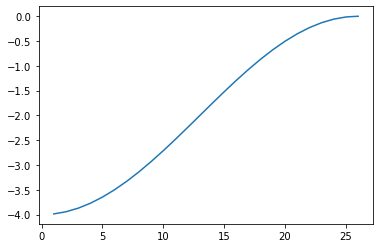

In [139]:
plt.plot(evals)

The motion should oscillate.